In [74]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [75]:
# Read in the data
df = pd.read_csv('./Data/small_box_office_flat_file.csv', header=0)

# ID isn't needed for analysis
df = df.drop('ID', axis=1)

# Separate data to Xs and y (target)
X_s = df.drop(['Revenue'], axis=1)
y = df['Revenue']

## Data Preprocessing

Let's convert Dtypes of each column to the right Dtype:

In [76]:
class DtypeTransformer:
    """Converts the columns in col_names to the specified dtype"""
    def __init__(self, df):
        self.df = df

    def transform(self, col_names, dtype):
        self.df[col_names] = self.df[col_names].astype(dtype)
        return self.df
    
    def transform_to_bull(self):
        
        #  Find all numeric columns
        column_names = df.select_dtypes(include=[np.number]).columns 

        # re-extracting the columns of numerical type (using awesome np.number1 :)) then getting the max of those and storing them in a temporary variable m.
        m = df[df.select_dtypes(include=[np.number]).columns].max().reset_index(name='max')
        n = m.loc[m['max']==1, 'max']

        # Extracted the indexes of the rows from n and stored them in temporary variable p.
        # These indexes are the same as the indexes from original dataframe 'df'.
        p = column_names[n.index]
        
        return self.transform(p, 'bool')

# We can use the DtypeTransformer to convert the columns to the correct dtypes
# Sending only features to transform
transformer = DtypeTransformer(X_s)

# Set boolean values to 'bool' dtype
transformer.transform_to_bull()

# Convert Categorical column to 'category' dtype
cat_column_names = ['OriginLang', 'CatRuntime', 'Genre']
transformer.transform(cat_column_names, 'category')

# Convert 'ReleaseDate' to datetime
transformer.transform('ReleaseDate', 'datetime64[ns]')

# Creating list of columns name by data type
bool_columns = list(X_s.select_dtypes(include=['bool']).columns)
cat_columns = list(X_s.select_dtypes(include=['category']).columns)
numeric_columns = list(X_s.select_dtypes(include=['int64', 'float64']).columns)



### Explore nullity in df

We would like to print only columns have null values in df

In [77]:
nullseries = X_s.isnull().sum()
print(nullseries[nullseries>0])

Actor0PrevRevenue            299
Actor1PrevRevenue            391
Actor2PrevRevenue            414
NumOfMoviesByProducer         56
NumOfWorkersArt                5
NumOfWorkersCamera             5
NumOfWorkersCrew               5
NumOfWorkersMkup               5
NumOfWorkersDirecting          5
NumOfWorkersEditing            5
NumOfWorkersLiting             5
NumOfWorkersWriting            5
NumOfWorkersProd               5
NumOfWorkersSound              5
NumOfWorkersVisualEffects      5
dtype: int64


## Visualize correlation with a diagonal correlation plot

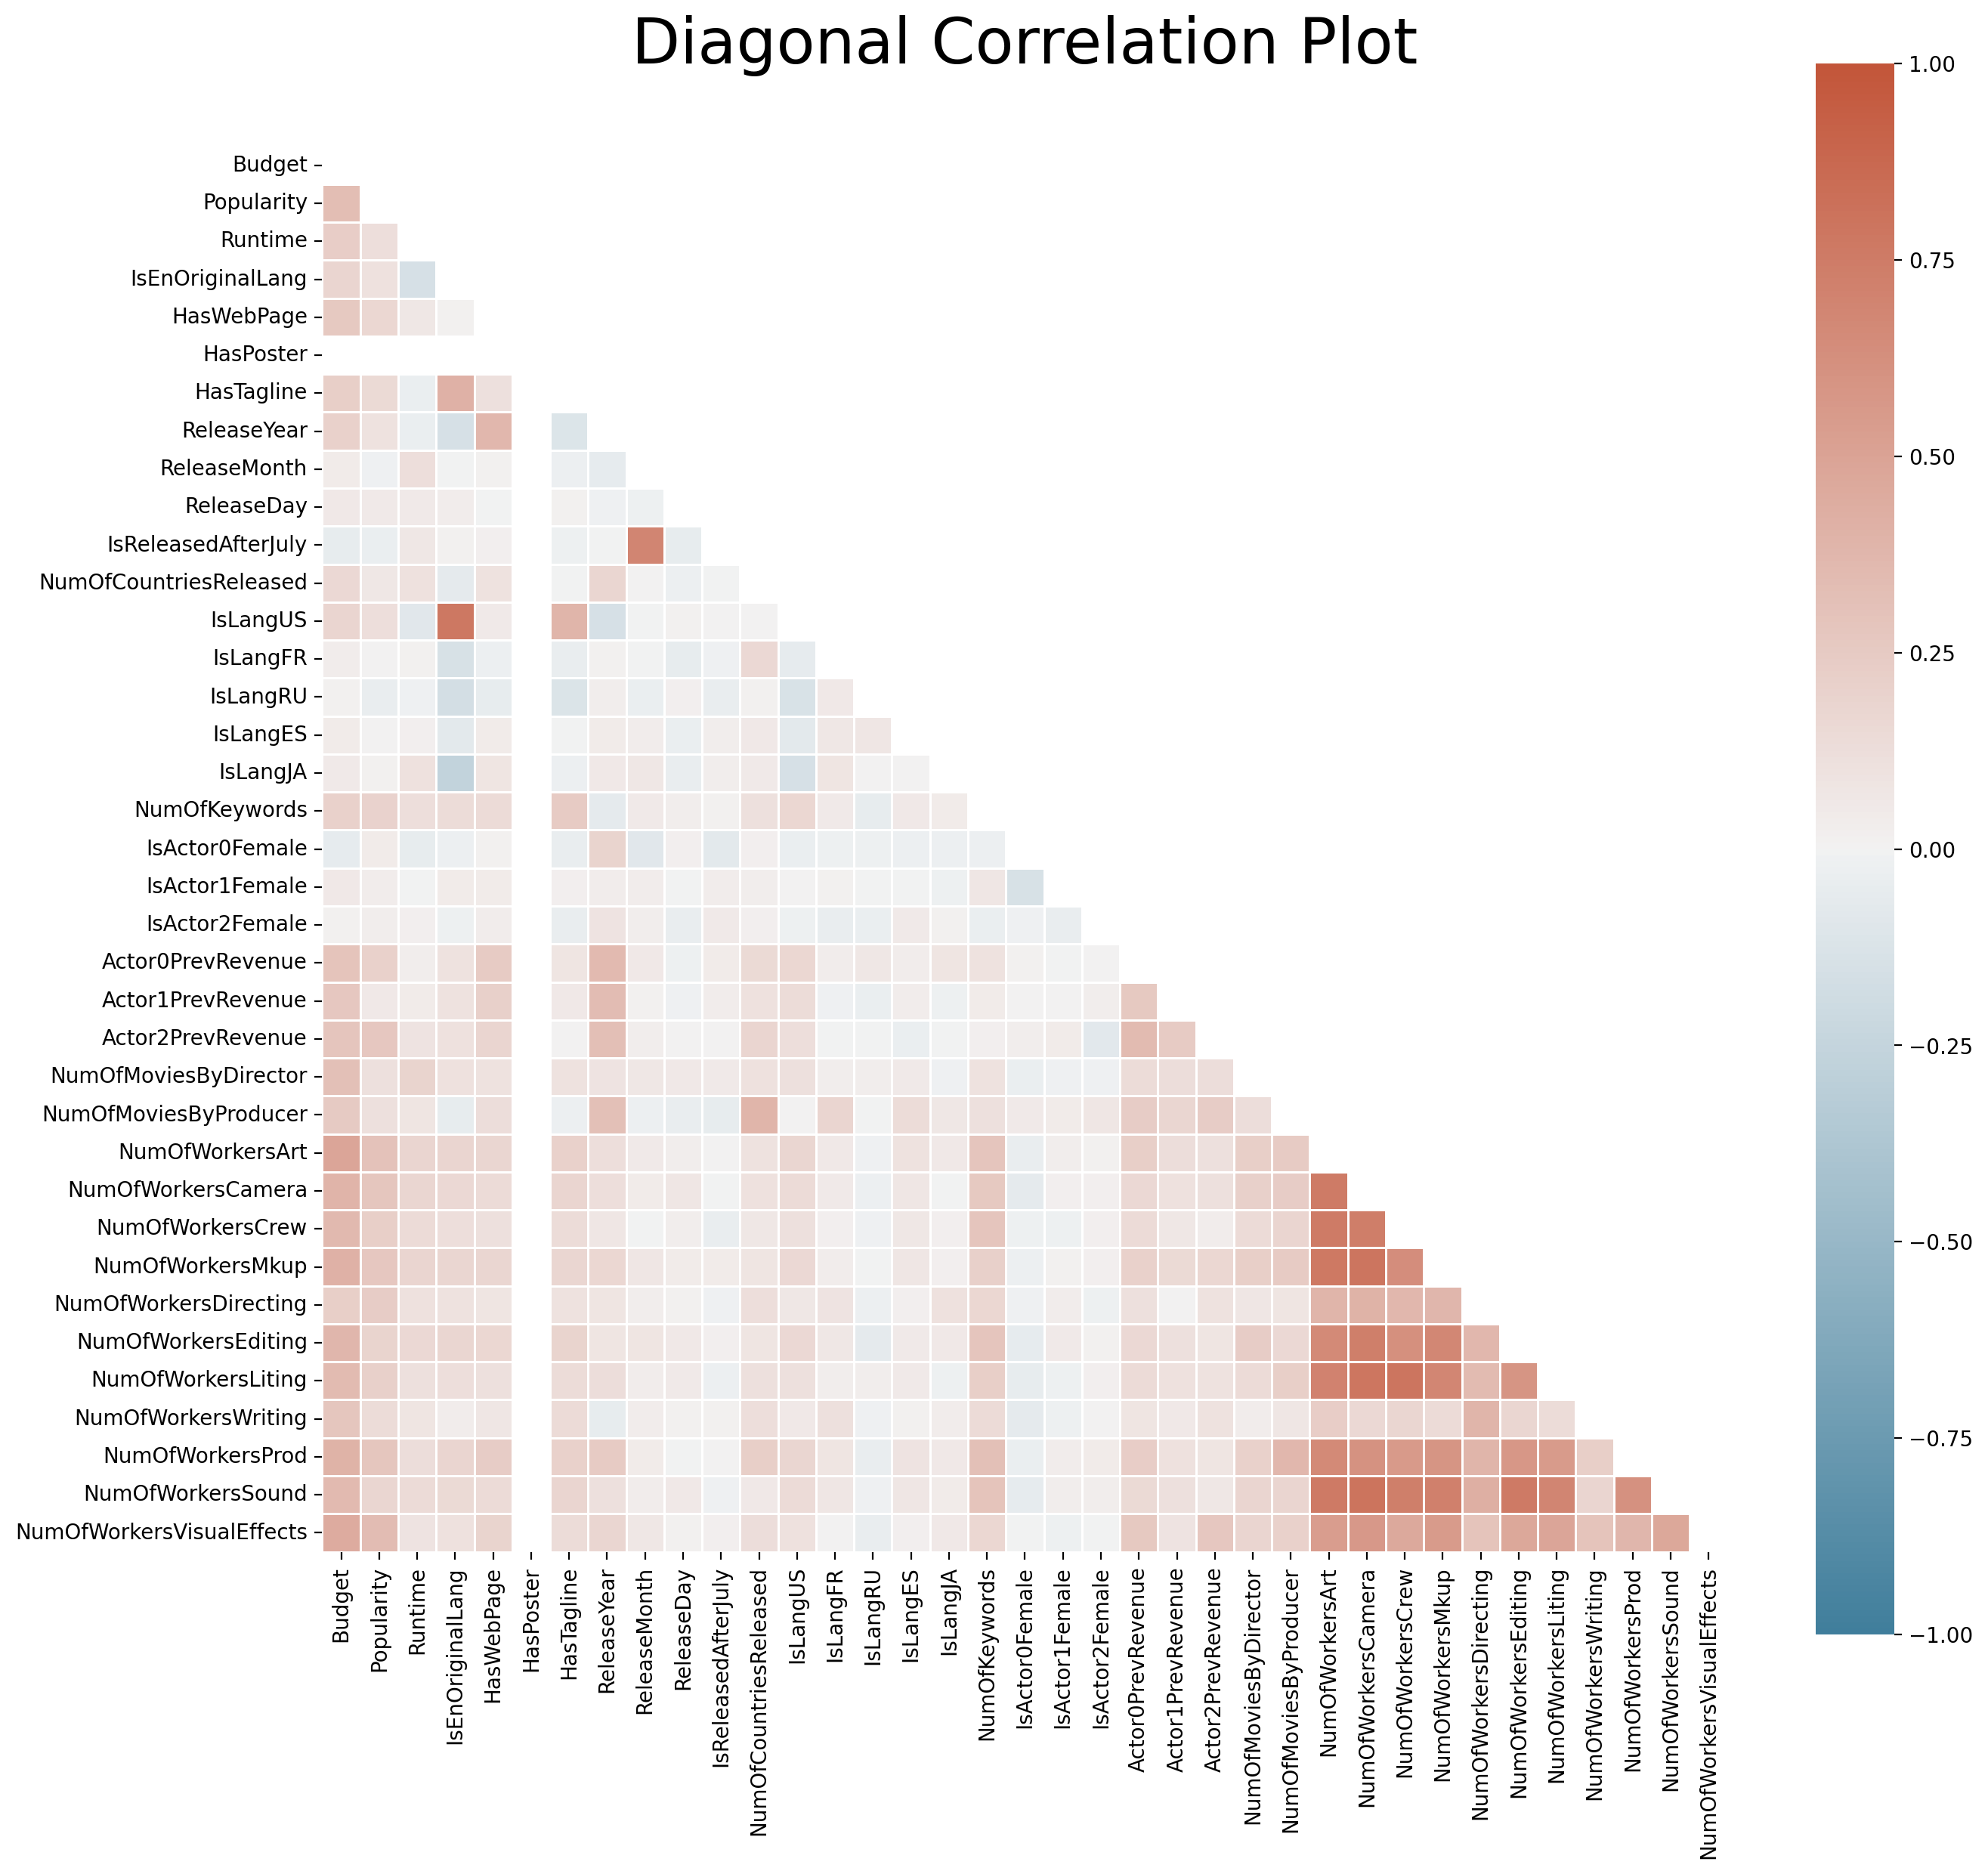

In [78]:
# Compute the correlation matrix with pearson correlation
corr = X_s.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 15))                    # Set figure size

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask 
sns.heatmap(corr, 
            mask = mask, 
            cmap = cmap, 
            vmax = 1,                                      # Set scale min value
            vmin = -1,                                     # Set scale min value
            center = 0,                                    # Set scale min value
            square = True,                                 # Ensure perfect squares
            linewidths = 1,                                # Set linewidth between squares
            cbar_kws = {"shrink": .9},                     # Set size of color bar
           );

plt.xticks(rotation=90)                                    # Rotate x labels
plt.yticks()
plt.title('Diagonal Correlation Plot', size=30, y=1.05);   # Set plot title and position

We see there exist a correlation between the sizes of the department crews (nothing spacial)


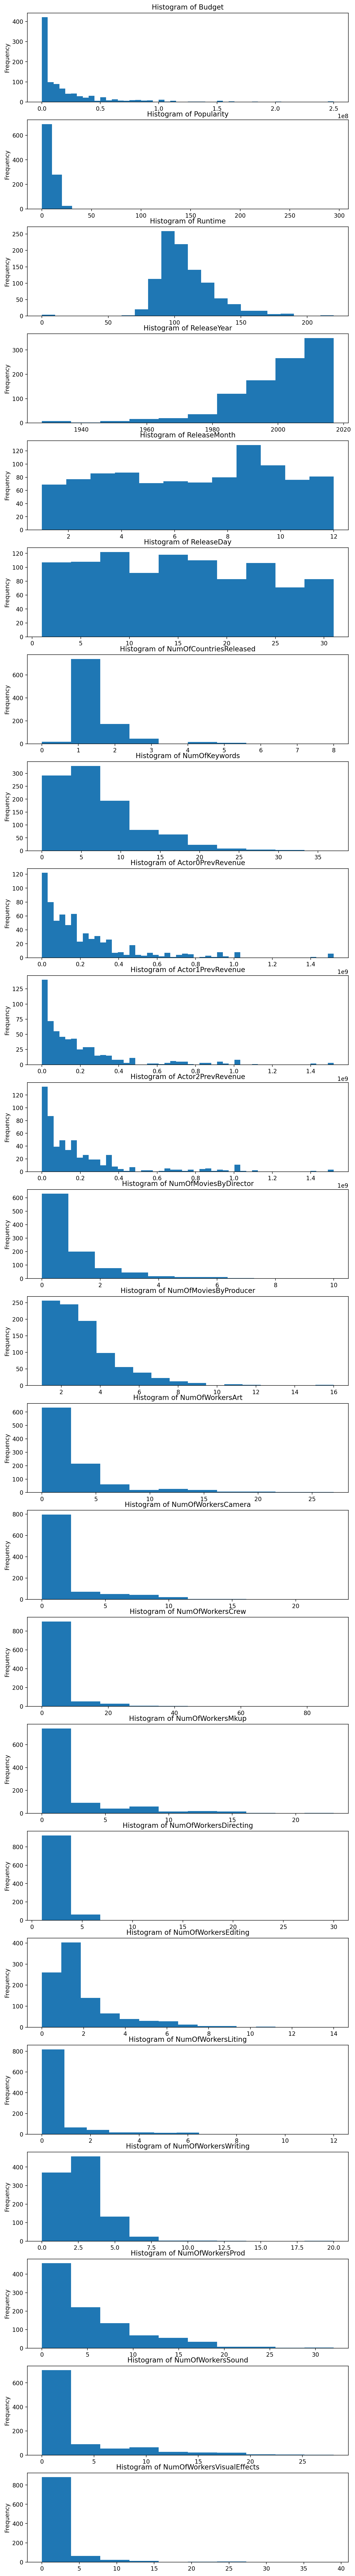

In [79]:
def find_bin_size(df, col_name):
    """Find the bin size for a given column"""
    # Find the min and max values
    min_val = df[col_name].min()
    max_val = df[col_name].max()
    
    # Find the range
    range_val = max_val - min_val + 1
    
    # Find the bin size
    bin_size = range_val / 10 if range_val > 20 else range_val
    
    return max(10, int(bin_size) if bin_size < 50 else 50)

fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 80))
plt.ticklabel_format(useOffset=False, style='plain')

for col, axis in zip(numeric_columns, axes):
    bin_size = find_bin_size(X_s, col)
    X_s.plot(kind='hist', y=col, bins=bin_size, ax=axis, legend=False,
             title='Histogram of ' + col)

## Describe and plot the target variable

In [80]:
# sns.displot(df.Revenue, kind='kde', height=5, aspect=2)
# df.drop(df.query("Revenue > (0.4*1e9)").index, inplace=True)
# sns.displot(df.Revenue, kind='kde', height=5, aspect=2)

# df.Revenue.describe()